# Isobraic binary phase diagrams

These are a few examples of how to use Thermo-Calc TDB files to calculate isobaric binary phase diagrams. As long as the TDB file is present, each cell in these examples is self contained and can completely reproduce the figure shown.

Units are Kelvin

## Importing modules

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
from pycalphad import Database, equilibrium, variables as v


### Defining file paths for program and database

In [3]:
# Set the file path
dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\\'

### Load database

In [4]:
# dbf = Database(dbf_diretory + 'COST507_Sundman.tdb') #Aluminum database
dbf = Database(dbf_diretory + 'COST507_Original.tdb') #Aluminum database

### Determine phases

In [7]:
#phases = ['LIQUID', 'FCC_A1', 'DIAMOND_A4'] #For Al-Si
phases = list(dbf.phases.keys())
# phases


## Set conditions

In [8]:
composition_range = {v.X('ZR'):(0,0.5,0.01)}
temperature_range = {v.T: (273.15, 2273.15, 10)}
pressure = {v.P:101325}
moles = {v.N: 1}

# Combine all conditions into a single dictionary
conditions = {**composition_range, **temperature_range, **pressure, **moles}


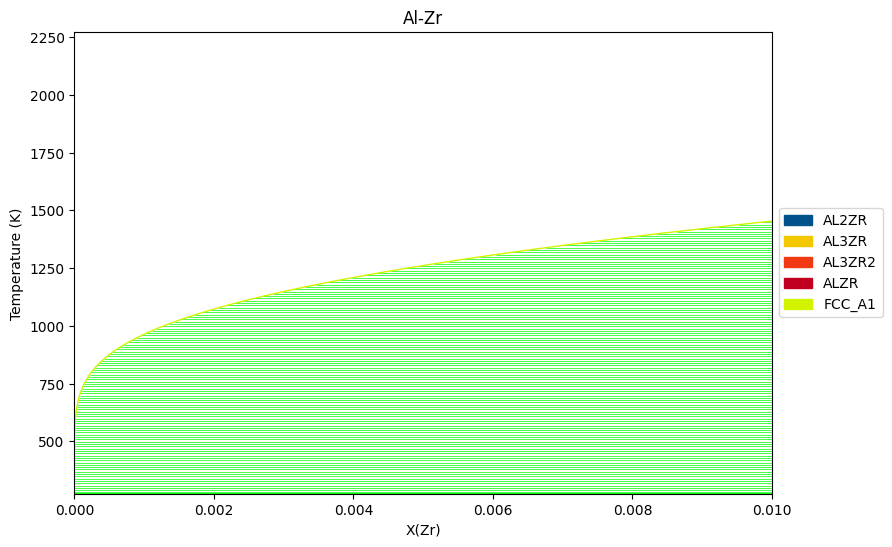

In [9]:
# Create a matplotlib Figure object and get the active Axes
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

# Compute the phase diagram and plot it on the existing axes using the `plot_kwargs={'ax': axes}` keyword argument
#VA = Vacancy, defines the abscence of an atom. 
# binplot(dbf, ['AL', 'TI', 'VA'] , phases, {v.X('TI'):(0,1,0.01), v.T: (273.15, 2273.15, 10), v.P:101325, v.N: 1}, plot_kwargs={'ax': axes})
binplot(dbf, ['AL', 'ZR', 'VA'] , phases, conditions, plot_kwargs={'ax': axes})

# Set axis limits AFTER plotting
# axes.set_xlim(0, 0.00566)  # Composition range
axes.set_xlim(0, 0.01)  # Composition range

axes.set_ylim(273, 2273)  # Temperature range in Kelvin

# Update axis labels
axes.set_ylabel('Temperature (K)')
# axes.set_xlabel('Mole Fraction of Ti')

plt.show()